In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from utils import *

% matplotlib inline

In [2]:
# Load and setup dataset
crimes_df = pd.read_csv('MontgomeryCountyCrime2013.csv')
dataset_conversion(crimes_df)
classify_occurrences(crimes_df)

In [3]:
hourly_crimes_df = crimes_df[['Category', 'Dispatch Date / Time']].copy()
hourly_crimes_df['Hour'] = hourly_crimes_df['Dispatch Date / Time'].dt.hour
hourly_crimes_df['Day Part'] = hourly_crimes_df['Hour'].apply(lambda h: 'Day' if 6 < h < 18 else 'Night')

In [4]:
cat_hour_df = hourly_crimes_df[['Category', 'Hour']]
cat_by_hour_pt = pd.pivot_table(cat_hour_df, index='Category', columns='Hour', aggfunc=len, fill_value=0)
cat_by_hour_pt

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Category,,,,,,,,,,,,,,,,,,,,,
Aggravated assault,14,10,13,5,2,6,2,0,0,3,...,11,10,7,5,7,5,11,12,11,10
Arson,0,2,0,4,1,0,0,2,1,0,...,1,2,1,0,0,1,2,1,3,2
Assault,78,62,59,35,21,17,19,24,32,57,...,60,72,87,65,78,78,79,92,88,83
Auto theft,5,7,7,6,7,8,19,29,37,42,...,26,20,14,15,18,21,14,5,8,11
Bad checks,0,1,0,1,0,0,1,0,0,1,...,2,2,3,1,2,1,1,2,0,0
Burglary,27,23,25,22,26,25,55,67,73,80,...,76,79,66,68,65,66,46,48,49,45
Disordely conduct,57,64,29,12,4,2,4,5,1,5,...,7,19,22,20,17,31,16,27,41,45
Drugs,196,137,63,48,19,36,10,19,30,51,...,70,74,71,87,103,124,183,165,256,269
Embezzle,1,1,1,0,1,1,0,5,6,7,...,14,20,10,14,24,7,5,5,3,3


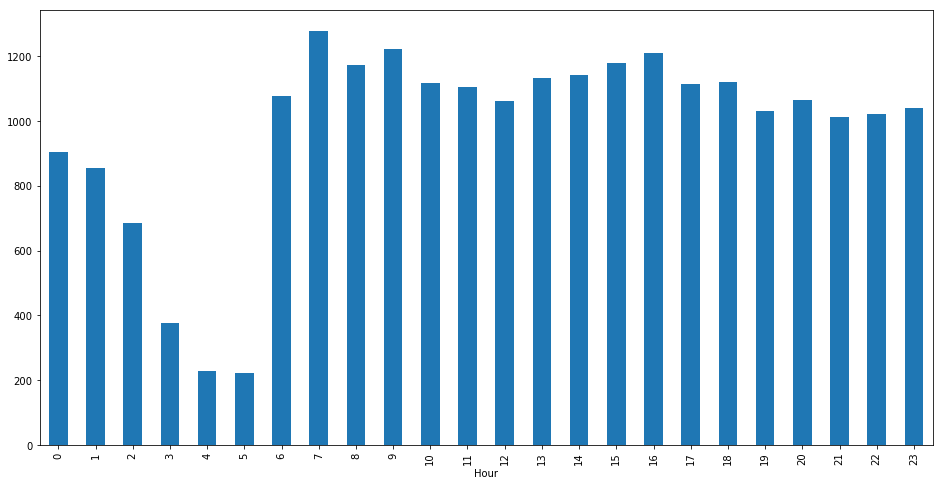

In [18]:
cat_by_hour_pt.sum().plot.bar(figsize=(16, 8))

In [17]:
cat_daypart_df = hourly_crimes_df[['Category', 'Day Part']]
cat_by_daypart_pt = pd.pivot_table(cat_daypart_df, index='Category', columns='Day Part', aggfunc=len, fill_value=0)
cat_by_daypart_pt

Day Part,Day,Night
Category,,
Aggravated assault,60,108
Arson,13,16
Assault,591,789
Auto theft,270,136
Bad checks,31,9
Burglary,778,522
Disordely conduct,119,349
Drugs,622,1609
Embezzle,123,52


Aggravated assault


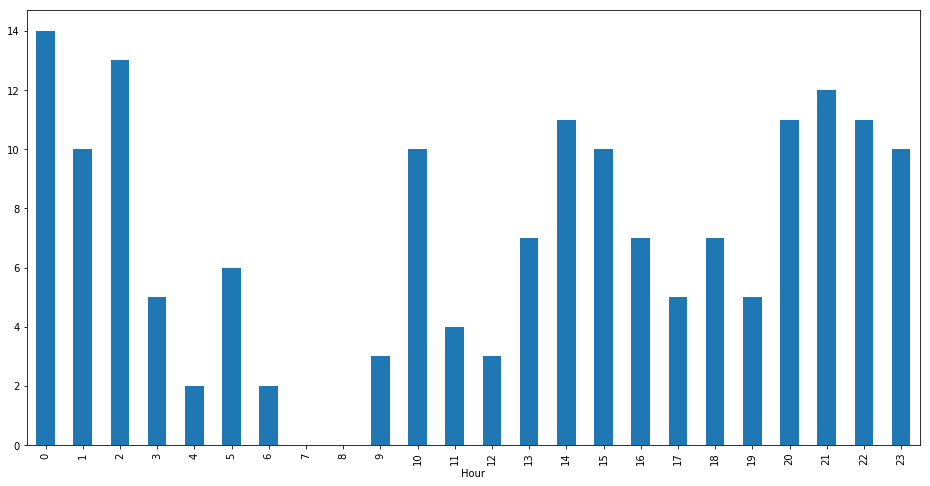

Arson


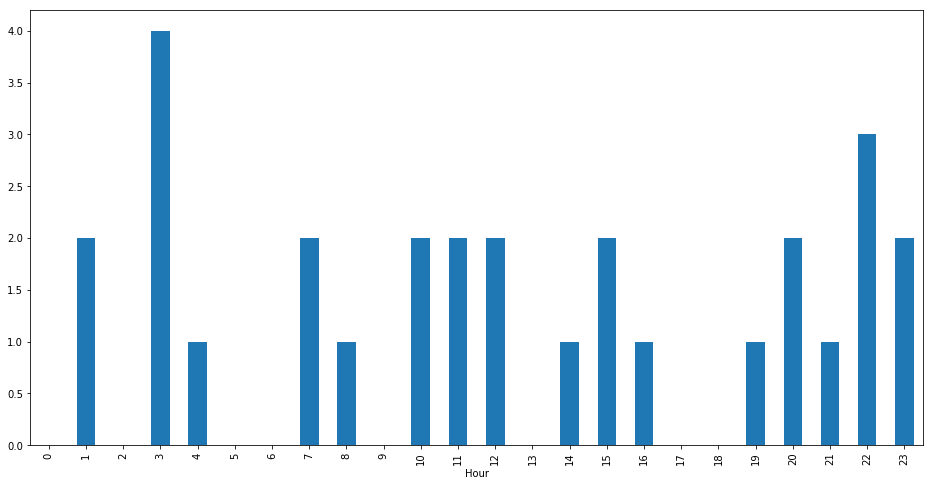

Assault


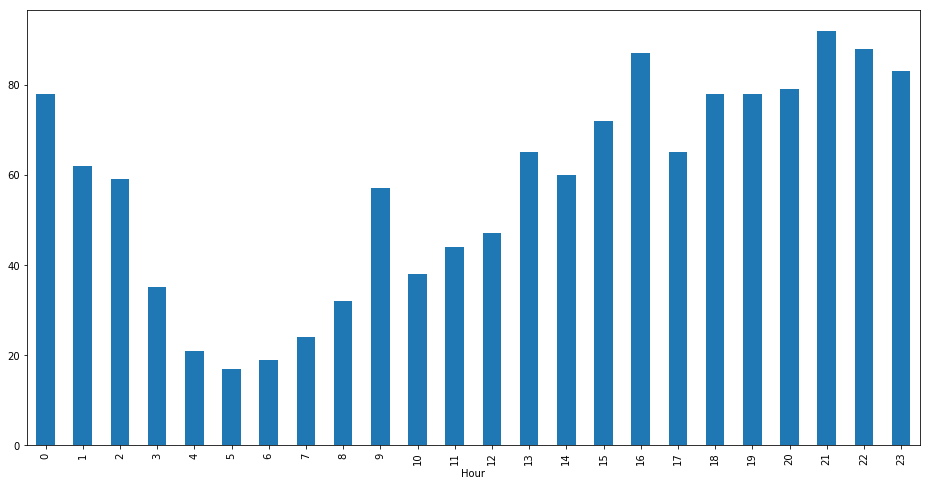

Auto theft


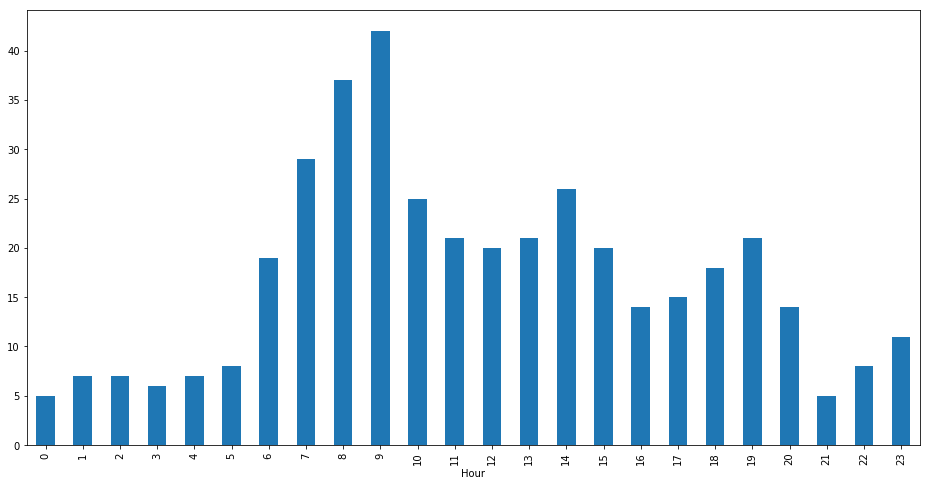

Bad checks


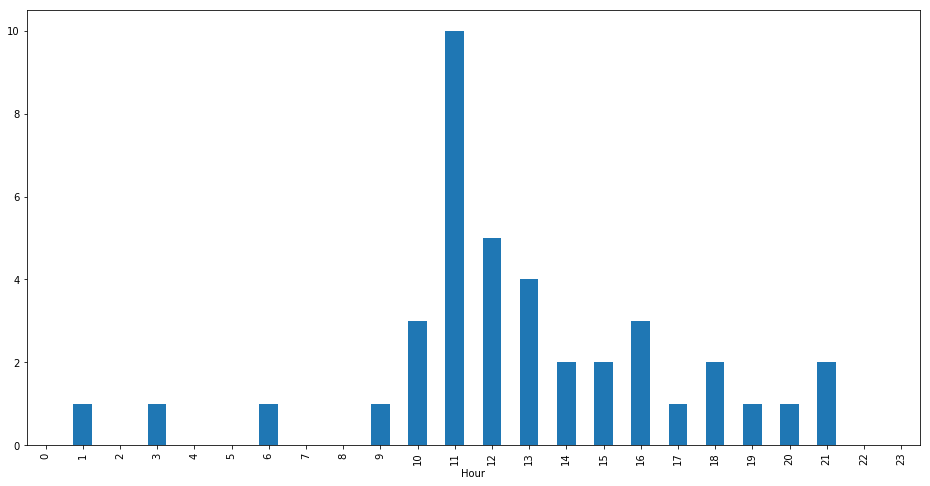

Burglary


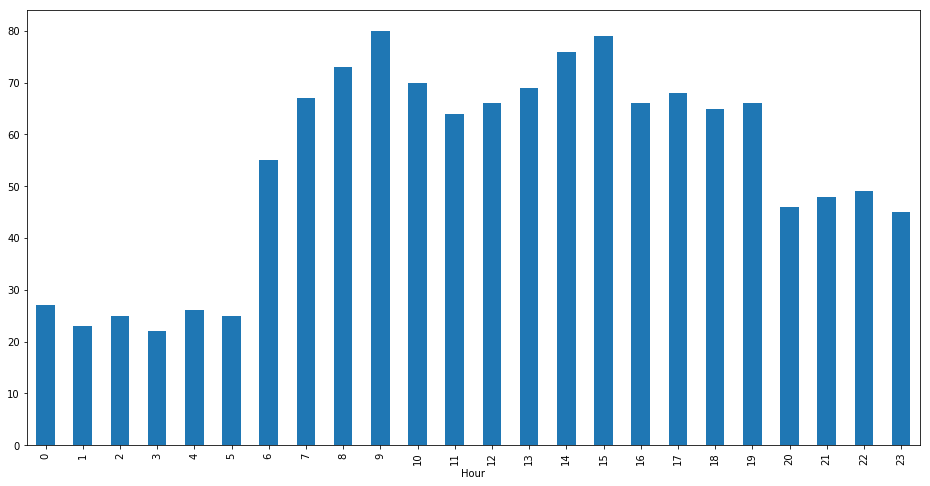

Disordely conduct


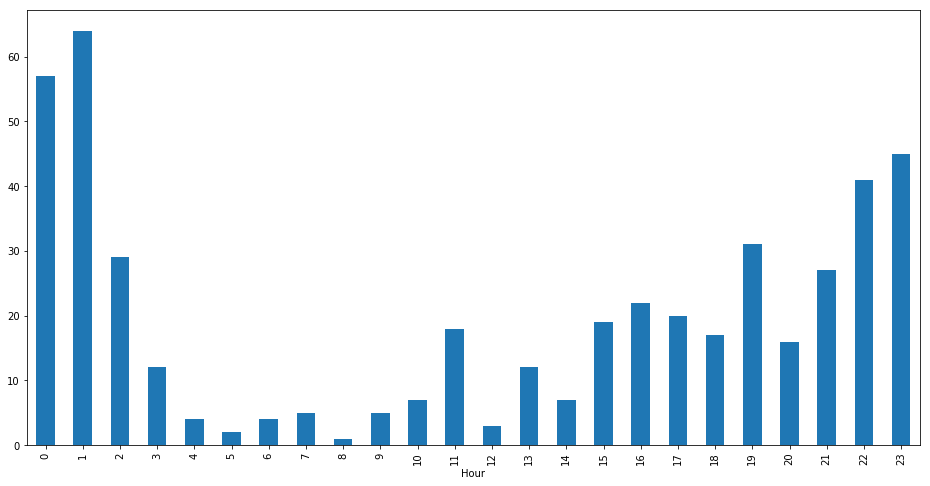

Drugs


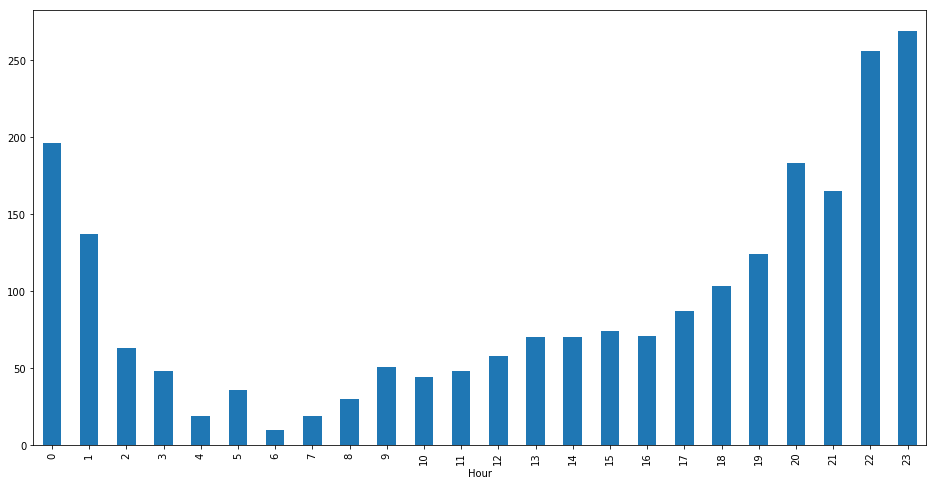

Embezzle


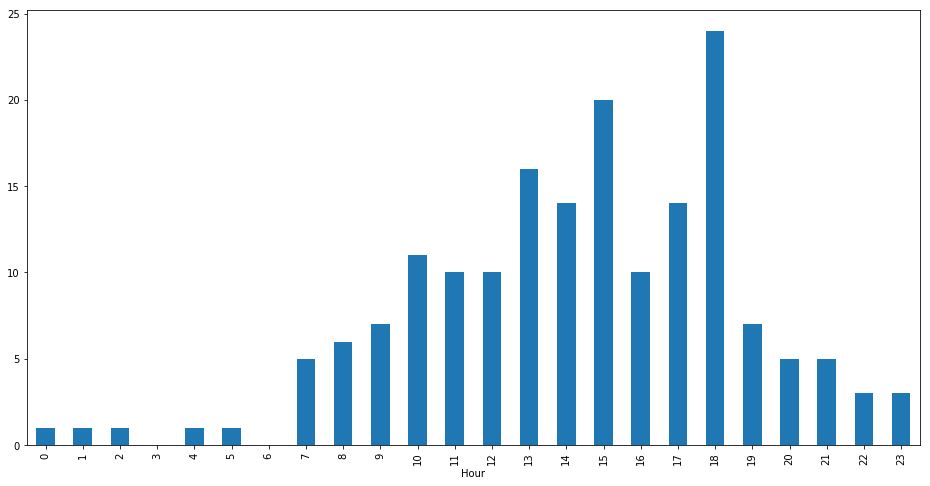

Family offenses


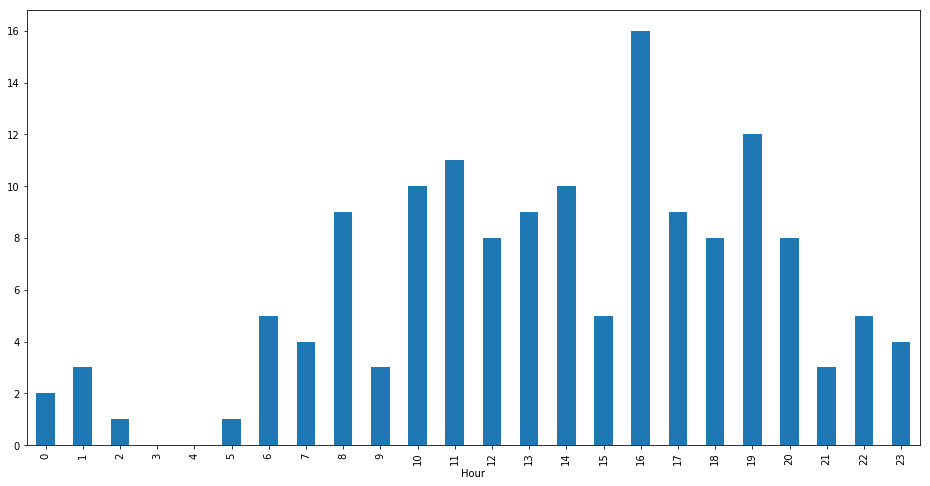

Forgery


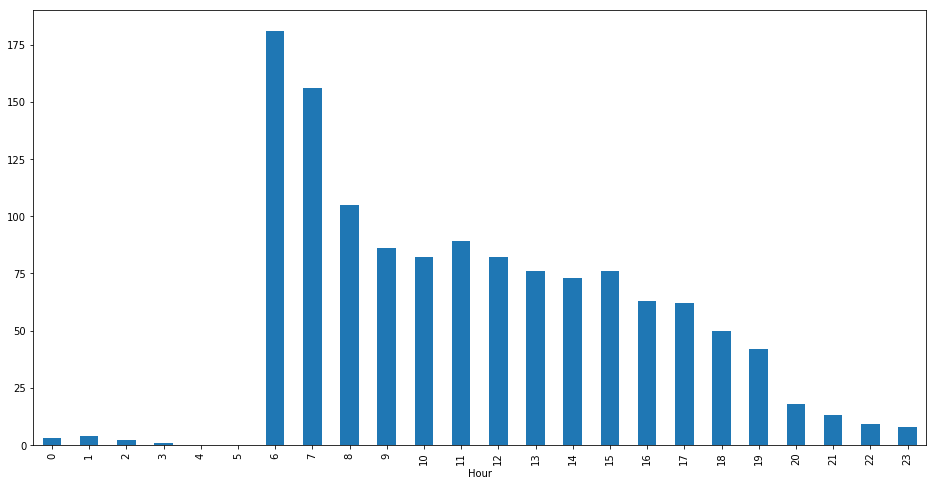

Homicide


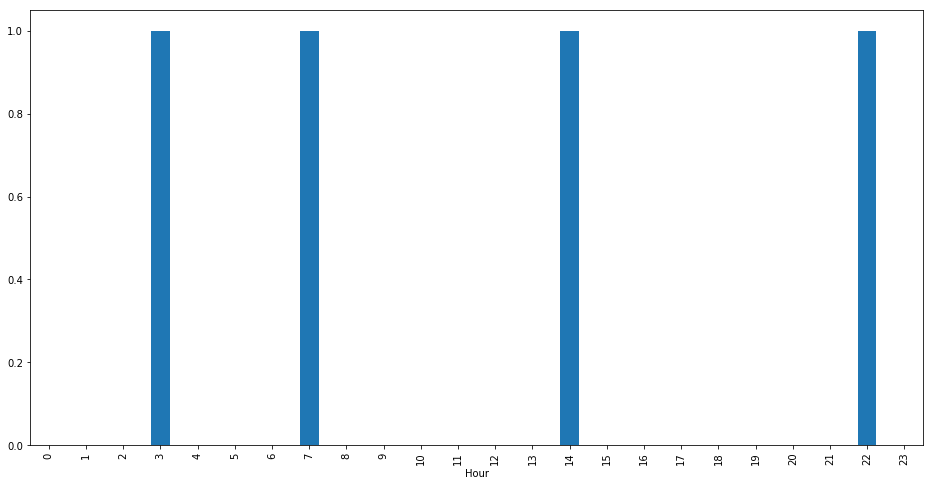

Juvenile


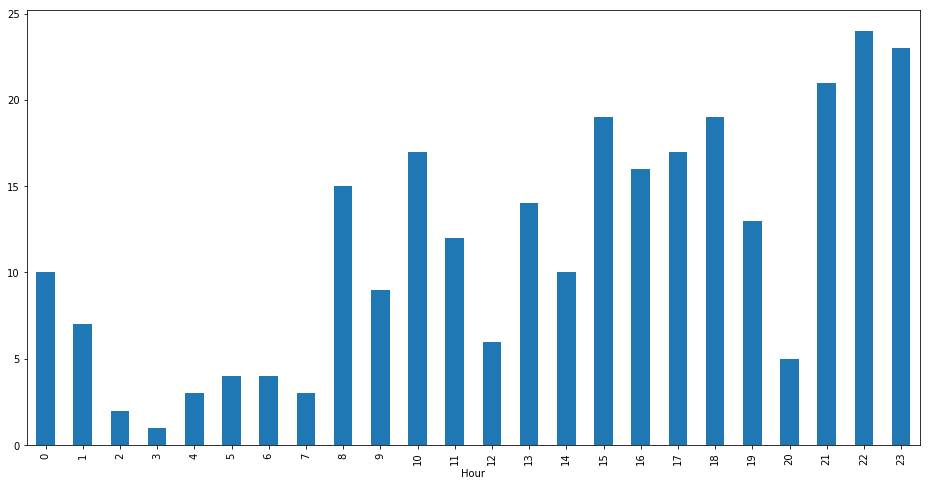

Larceny


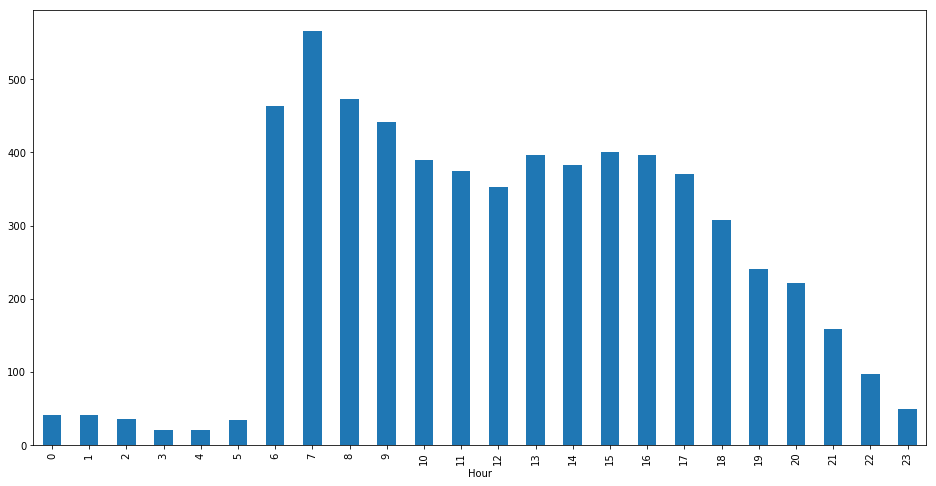

Liquor laws


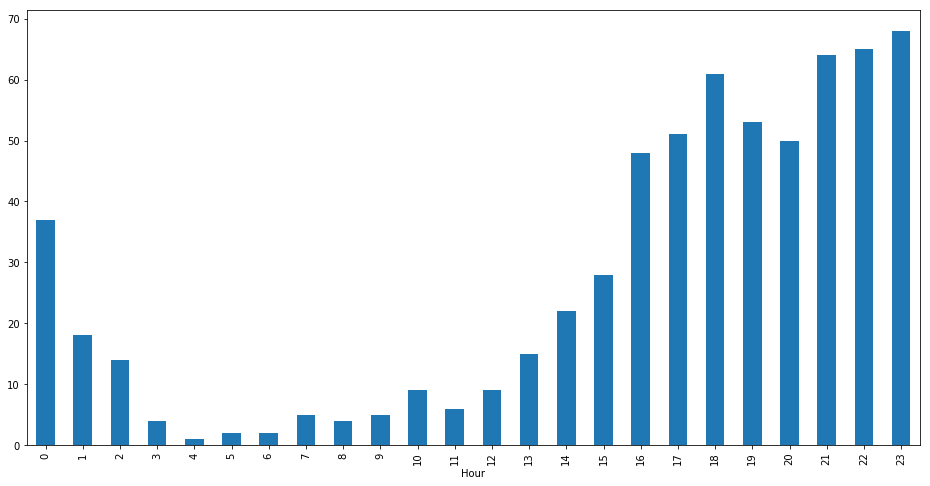

Miscelaneous


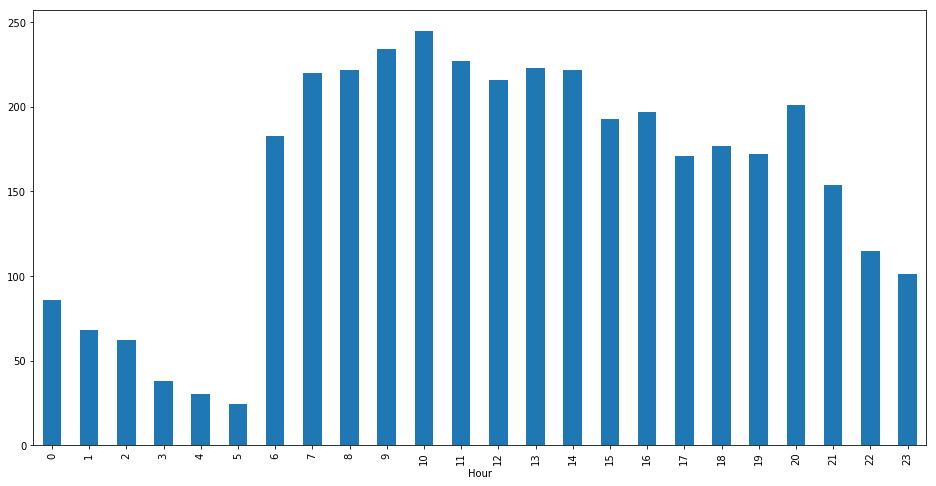

Miscelaneous traffic


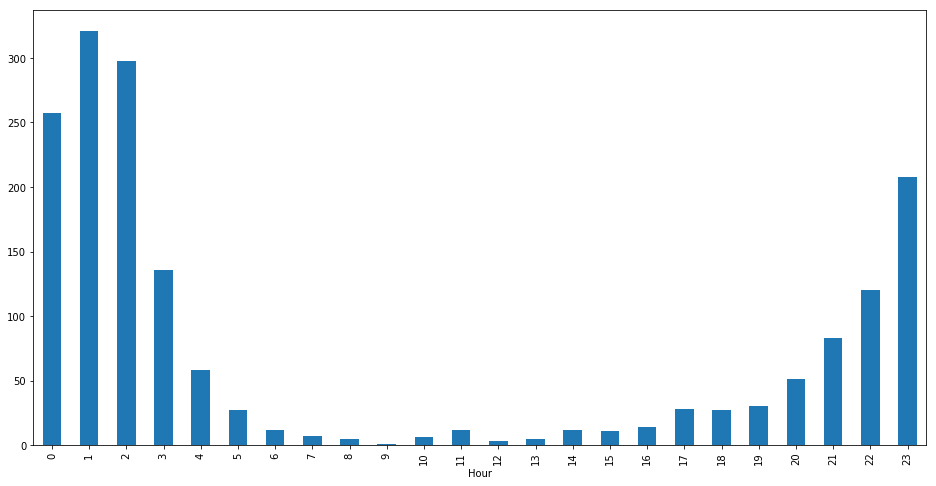

Other offenses


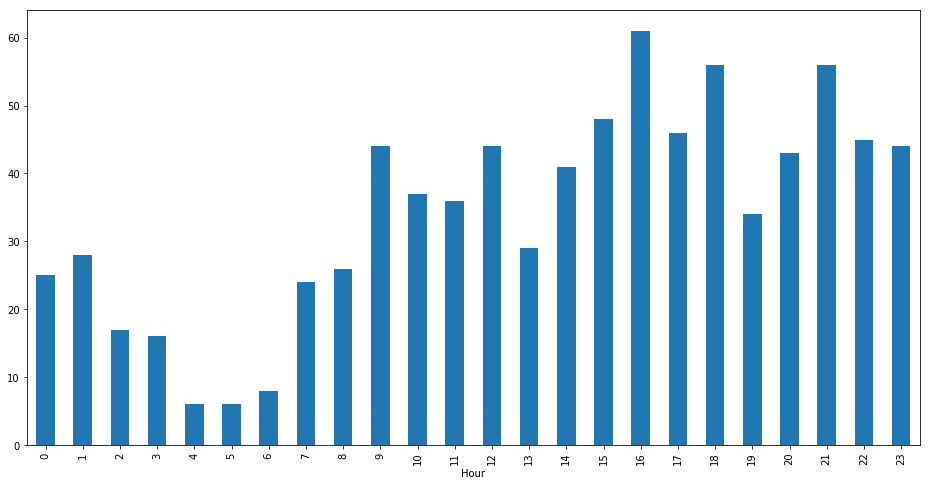

Rape


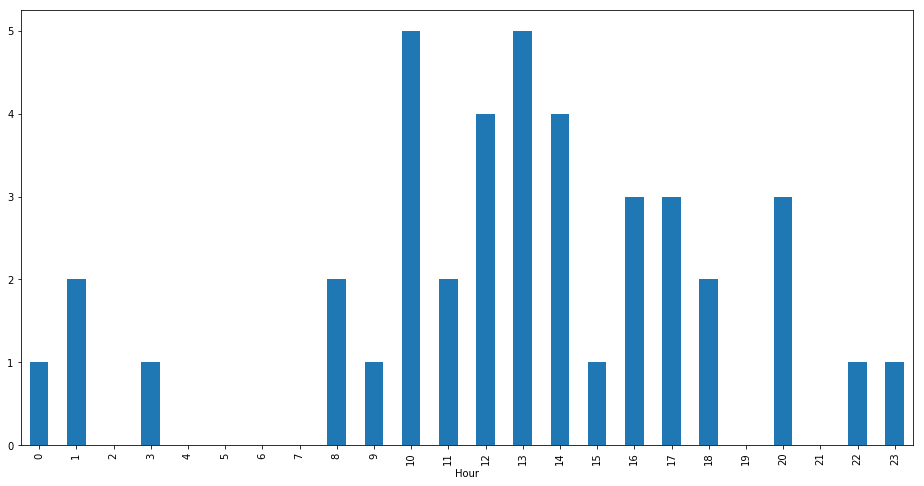

Robbery


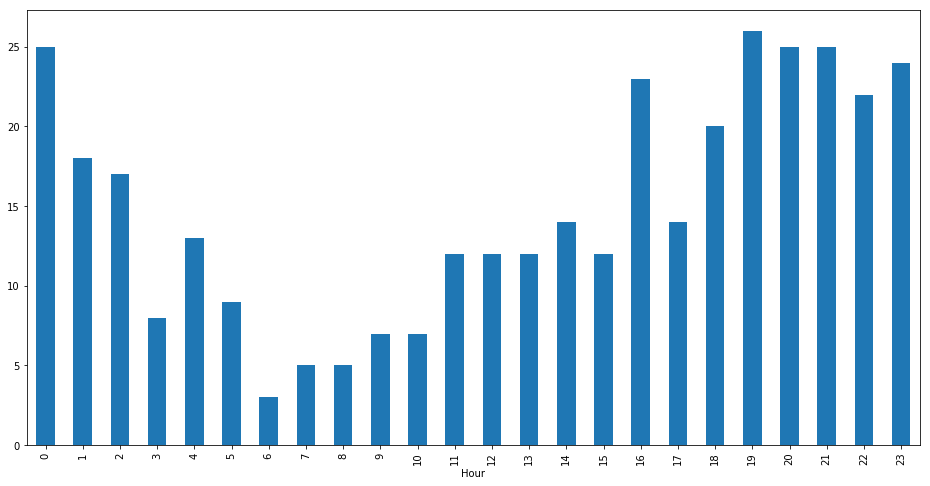

Sex offenses


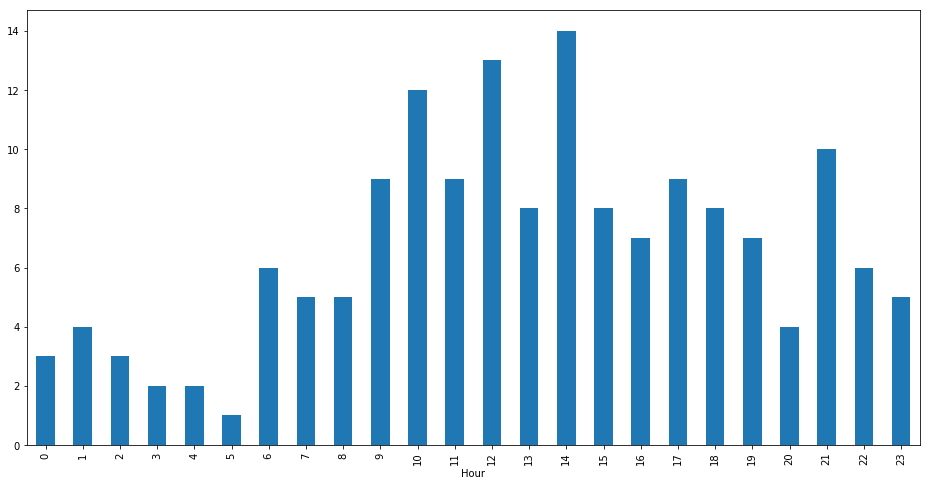

Stolen property


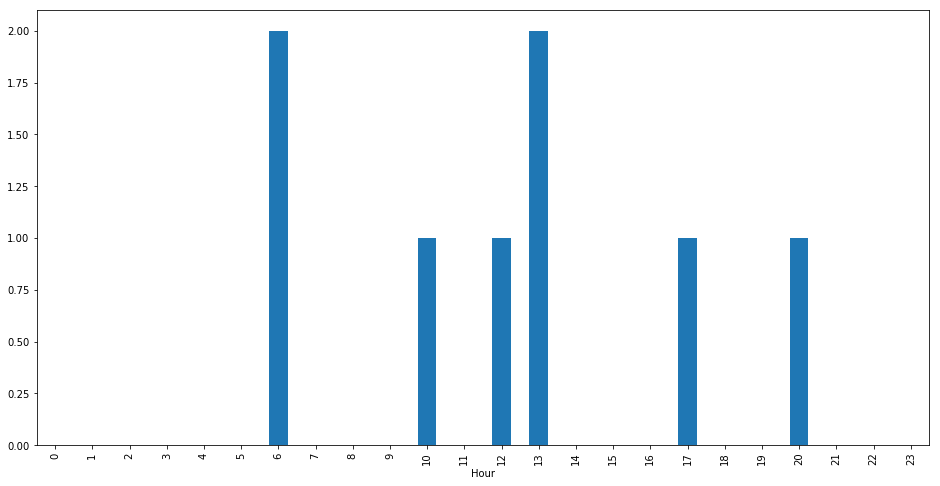

Suicide


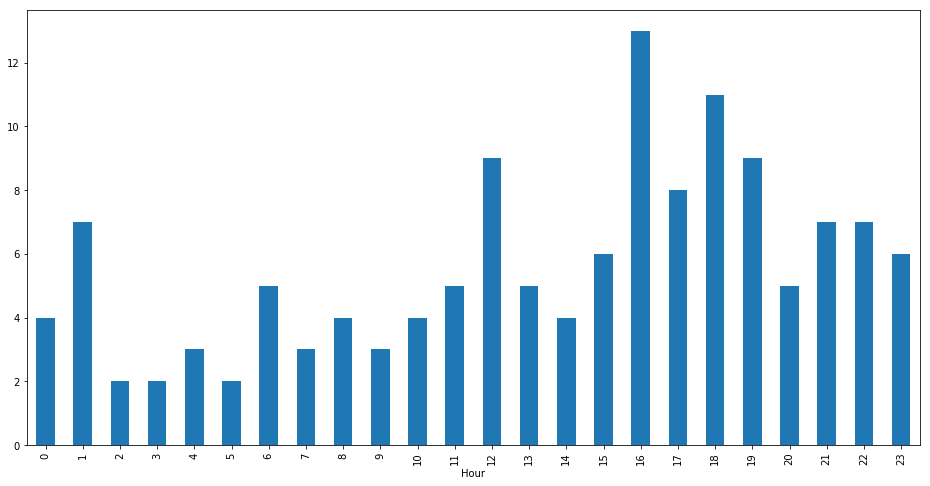

Vandalism


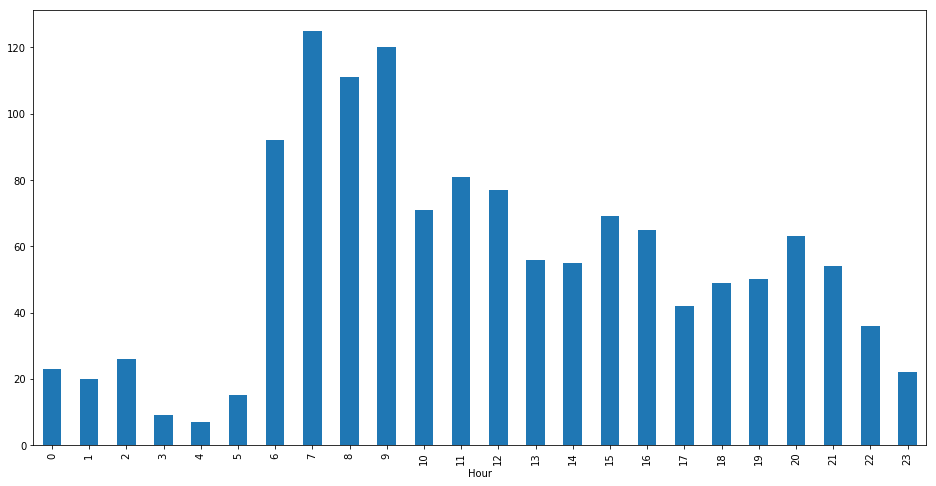

Vice


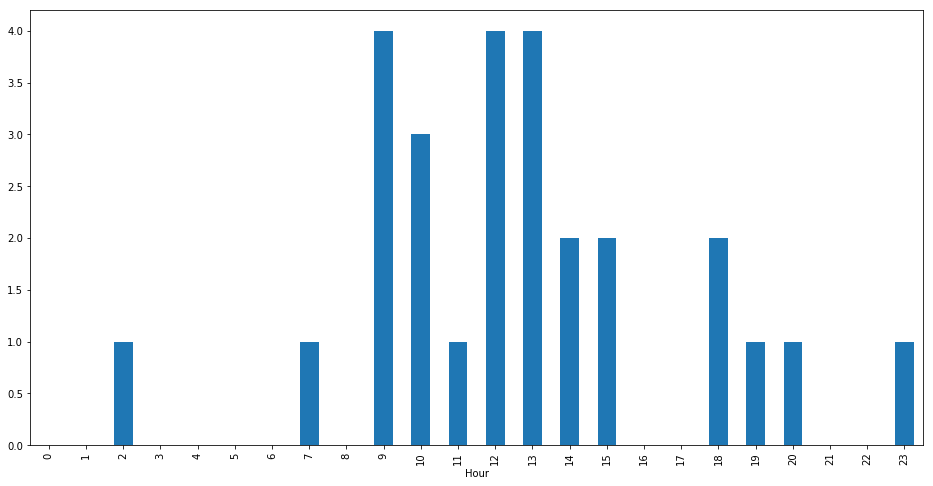

Weapon_offenses


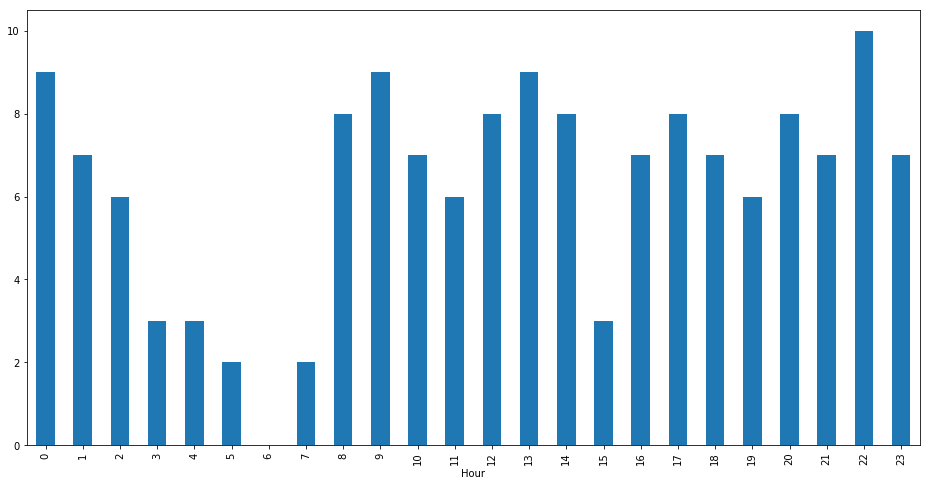

In [6]:
# Bar plot hourly crimes
for cat in cat_by_hour_pt.index:
    print(cat)
    cat_by_hour_pt.loc[cat].plot.bar(figsize=(16, 8))
    plt.show()    

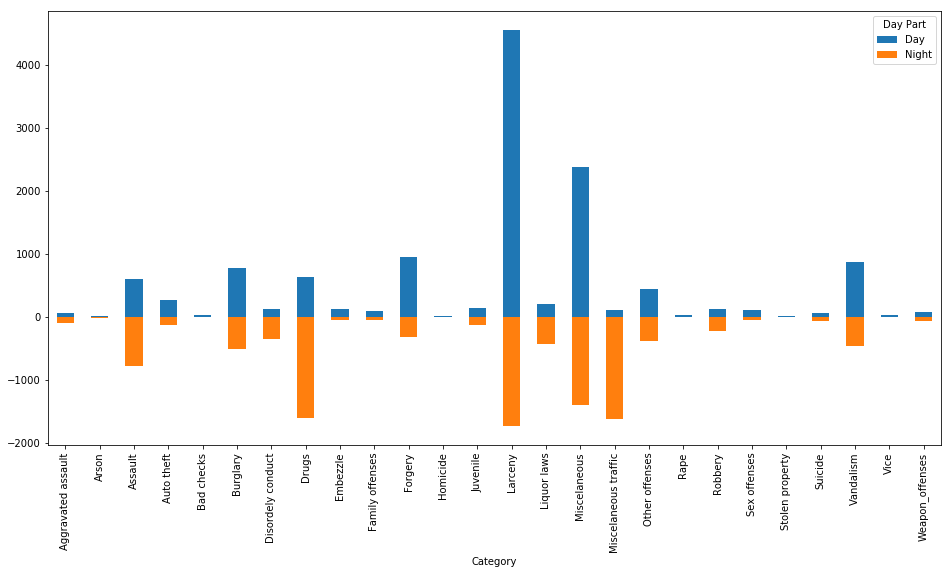

In [7]:
cat_by_daypart_pt['Night'] = - cat_by_daypart_pt['Night']
cat_by_daypart_pt.plot.bar(figsize=(16, 8), stacked=True)
cat_by_daypart_pt['Night'] = - cat_by_daypart_pt['Night']

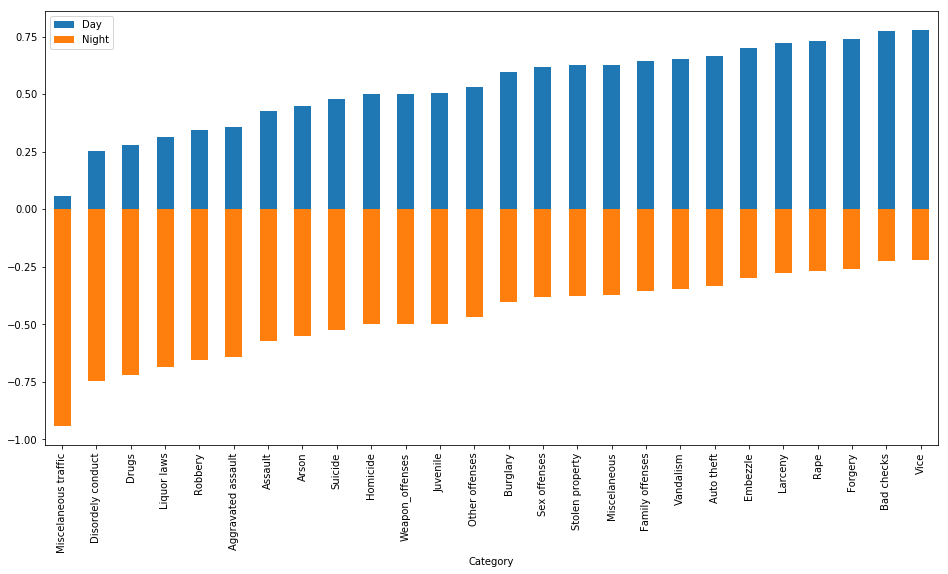

In [8]:
norm_df = pd.DataFrame()
norm_df['Day'] = cat_by_daypart_pt['Day'] / cat_by_daypart_pt.sum(1).values
norm_df['Night'] = - cat_by_daypart_pt['Night'] / cat_by_daypart_pt.sum(1).values
norm_df.sort_values('Day').plot.bar(figsize=(16, 8), stacked=True)

# Hourly occurrence analysis

The analysis made are the how much of each category of crime occurred by each hour of the day e how much crimes occurred in day time and night time. These analysis help us to see how the occurrences are spread along the day and give prediction power about the behavior of the occurrences. Let's see the Drugs category for example, the  Day/Night dsitribution of the crimes clearly points to a high increase of occurrence during the night, more than two times the occurrences during the day. If look for the same category hourly we can see that the increase occurs at 18:00 hours and the decrease at 2:00 hours. Larceny, in the other hand is a crime that occurs more likely by the day having a decrease of almost 3 times. Again, the times are clearly distiguishble at 6:00 and 22:00.


In [9]:
weekly_crimes_df = crimes_df[['Category', 'Dispatch Date / Time']].copy()
weekly_crimes_df['Weekday'] = weekly_crimes_df['Dispatch Date / Time'].dt.weekday_name
weekly_crimes_df['Weekday'] = pd.Categorical(weekly_crimes_df['Weekday'])
weekly_crimes_df['Weekpart'] = weekly_crimes_df['Weekday'].apply(lambda wd: 'Weekend' if wd == 'Saturday' or wd == 'Sunday' else 'Weekday')

In [10]:
weekday_df = weekly_crimes_df[['Category', 'Weekday']]
cat_weekday_pt = pd.pivot_table(weekday_df, index='Category', columns='Weekday', aggfunc=len, fill_value=0)
cat_weekday_pt[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Category,,,,,,,
Aggravated assault,27,18,23,21,18,29,32
Arson,4,6,3,2,4,3,7
Assault,169,197,182,198,191,228,215
Auto theft,56,62,49,68,66,56,49
Bad checks,10,7,7,5,6,3,2
Burglary,246,232,168,201,198,126,129
Disordely conduct,41,57,41,76,76,103,74
Drugs,236,434,418,367,380,231,165
Embezzle,33,35,33,21,38,12,3


In [11]:
weekpart_df = weekly_crimes_df[['Category', 'Weekpart']]
cat_weekpart_pt = pd.pivot_table(weekpart_df, index='Category', columns='Weekpart', aggfunc=len, fill_value=0)
cat_weekpart_pt['Weekday'] = cat_weekpart_pt['Weekday'] / 5
cat_weekpart_pt['Weekend'] = cat_weekpart_pt['Weekend'] / 2
cat_weekpart_pt[cat_weekpart_pt['Weekend'] < cat_weekpart_pt['Weekday']]

Weekpart,Weekday,Weekend
Category,,
Auto theft,60.2,52.5
Bad checks,7.0,2.5
Burglary,209.0,127.5
Drugs,367.0,198.0
Embezzle,32.0,7.5
Family offenses,25.2,10.0
Forgery,237.4,47.0
Juvenile,40.6,35.5
Larceny,1035.8,549.0


# Weekly analysis

The same analysis was applied with a week window and also distinguihsing the weekend from the weekday. To make a slight normalization the weekday column was divided by 5 and the weekdend for 2, so both columns have the 'unit' 'occurrences by day'. In these analysis we can see which crimes are more common at weekend or weekday, also is possible to check if exist a seasonality by week. Rapidly when can see that 9 categories are more common at the weekend:

- Aggravated assault
- Arson
- Assault
- Disordely conduct
- Homicide
- Miscelaneous traffic
- Robbery
- Stolen property
- Suicide

The ratio between the weekday and weekend data varies from .4 to .87, and the occurrences with greater ratio are:

- Robbery
- Suicide
- Assault

There are various category with greate incidence during the weekdays like:

- Larceny
- Miscelaneous
- Drugs

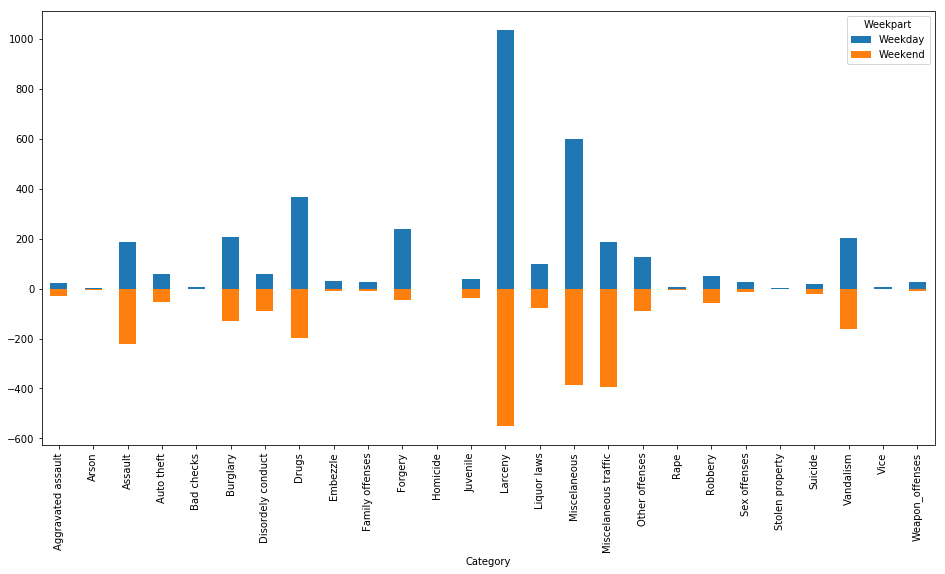

In [12]:
# Bar plot weekly crimes
cat_weekpart_pt['Weekend'] = - cat_weekpart_pt['Weekend']
cat_weekpart_pt.plot.bar(figsize=(16, 8), stacked=True)
cat_weekpart_pt['Weekend'] = - cat_weekpart_pt['Weekend']

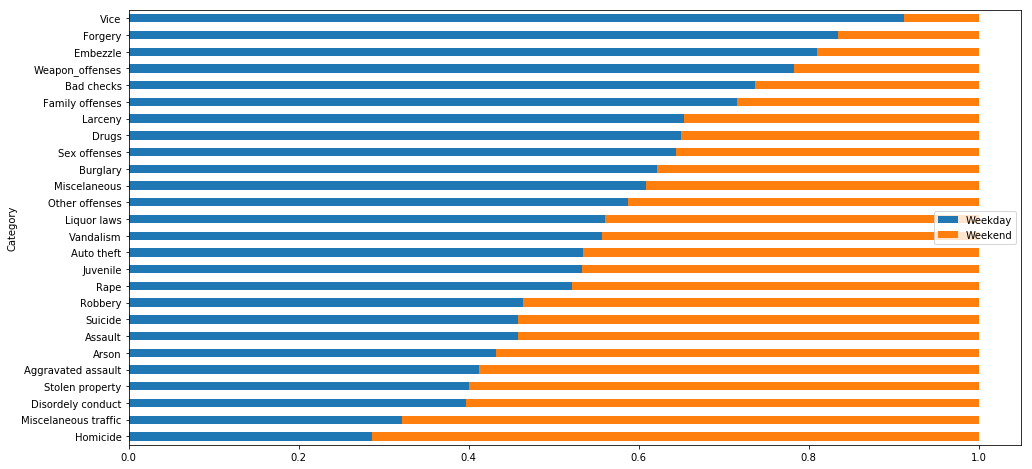

In [13]:
norm_df = pd.DataFrame()
norm_df['Weekday'] = cat_weekpart_pt['Weekday'] / cat_weekpart_pt.sum(1).values
norm_df['Weekend'] = cat_weekpart_pt['Weekend'] / cat_weekpart_pt.sum(1).values
norm_df.sort_values('Weekday').plot.barh(figsize=(16, 8), stacked=True)

Aggravated assault


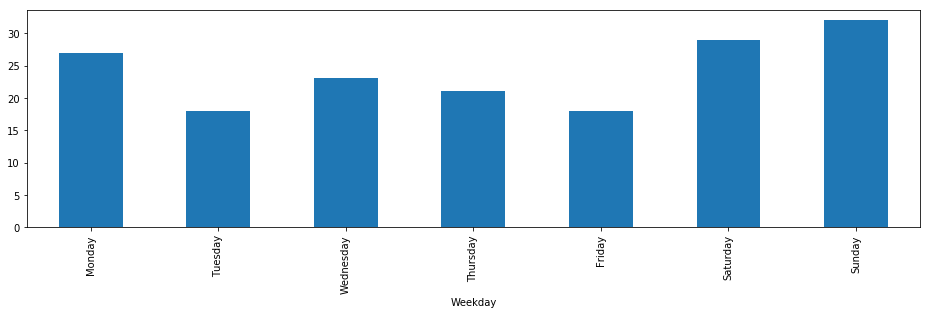

Arson


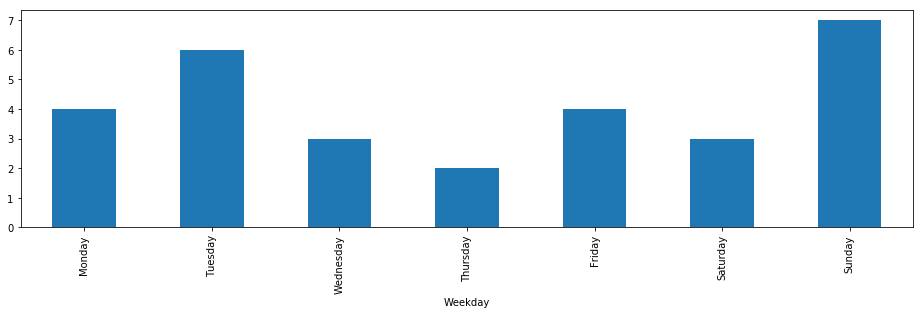

Assault


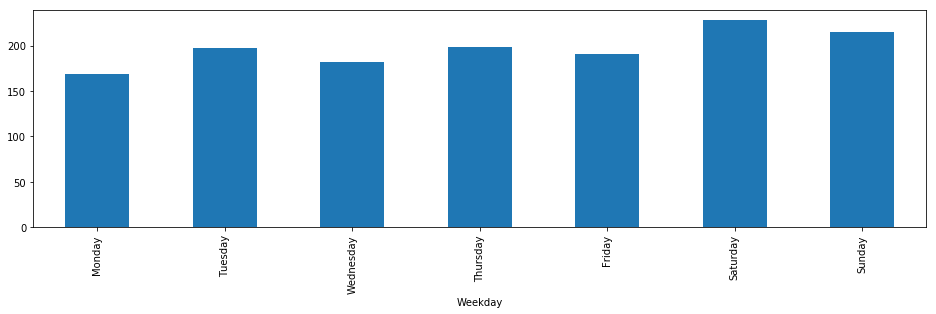

Auto theft


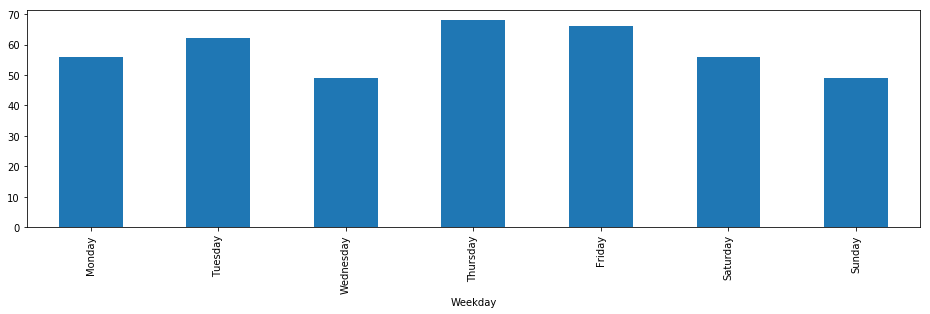

Bad checks


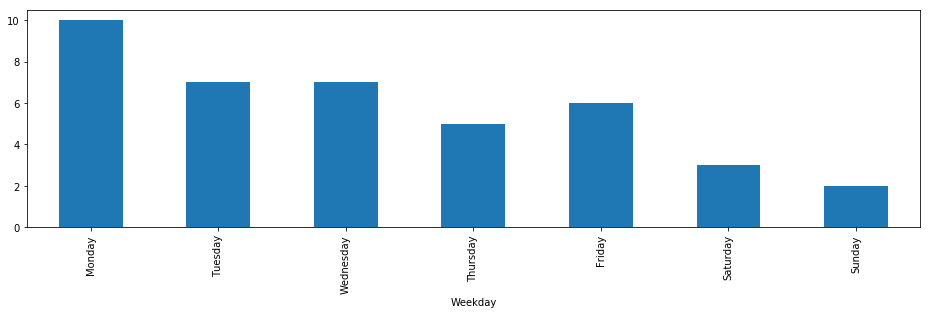

Burglary


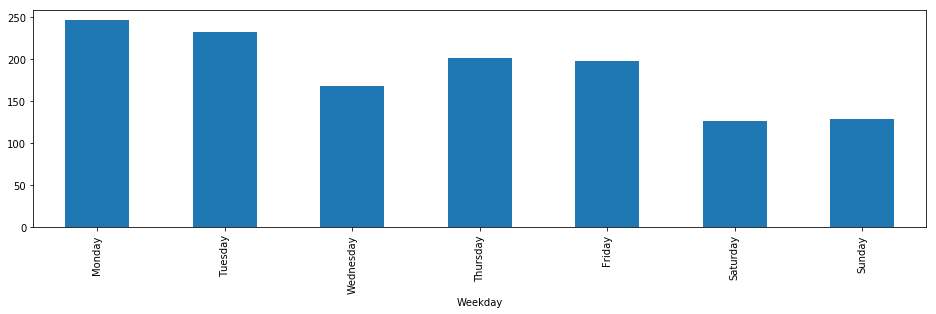

Disordely conduct


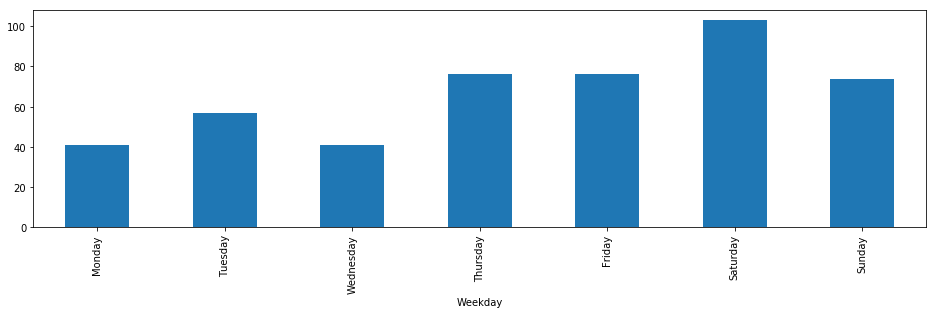

Drugs


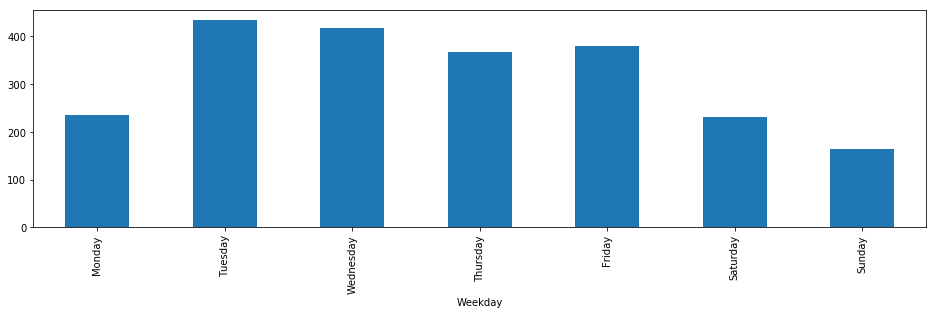

Embezzle


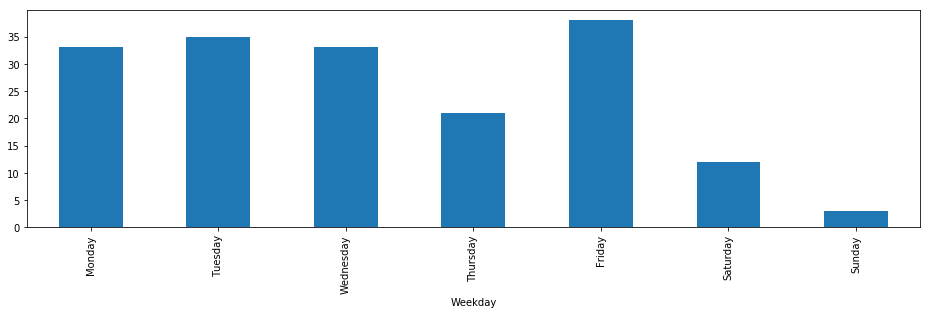

Family offenses


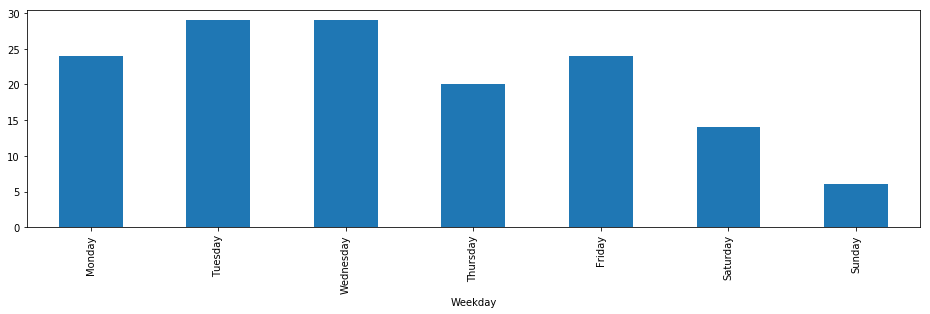

Forgery


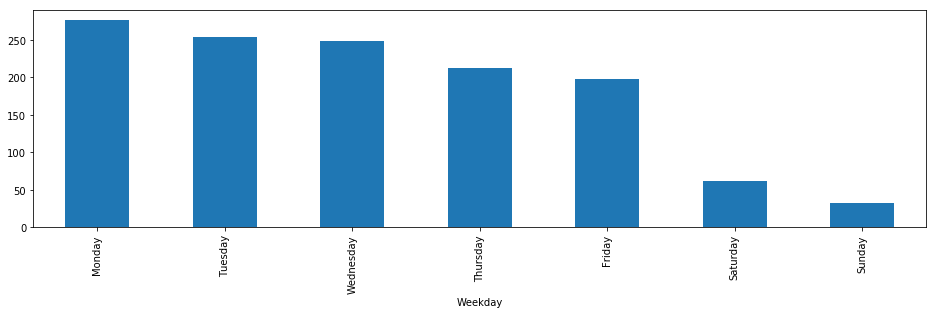

Homicide


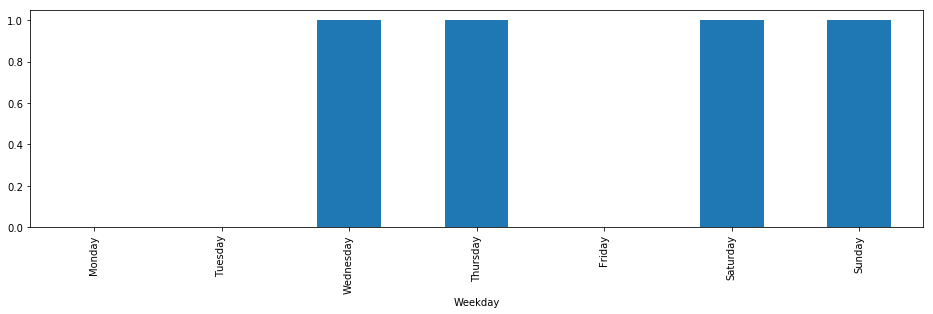

Juvenile


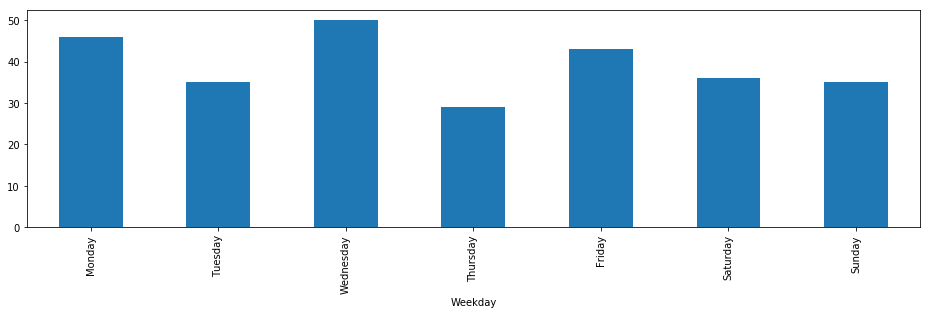

Larceny


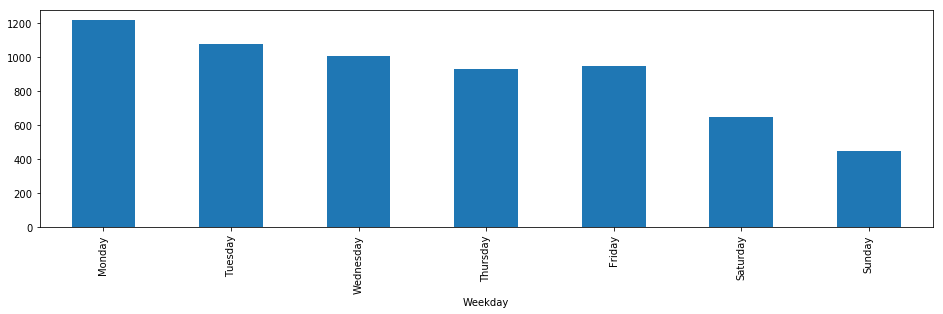

Liquor laws


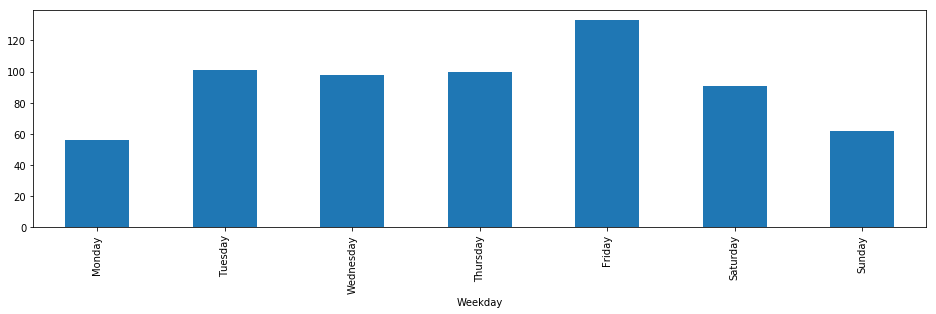

Miscelaneous


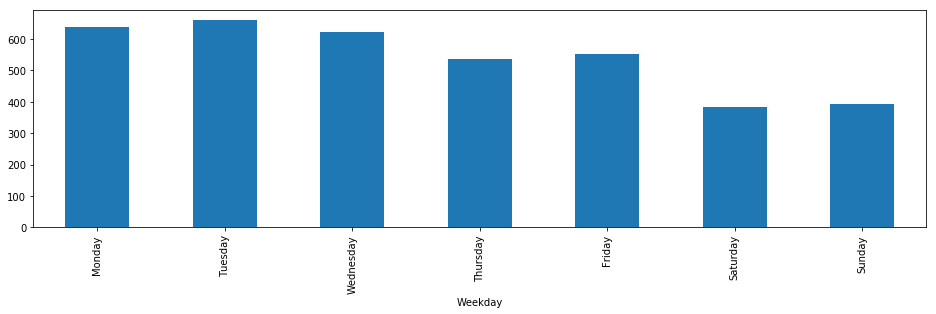

Miscelaneous traffic


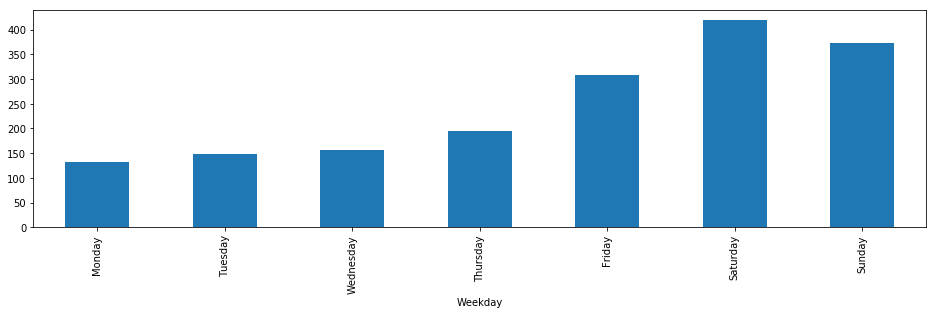

Other offenses


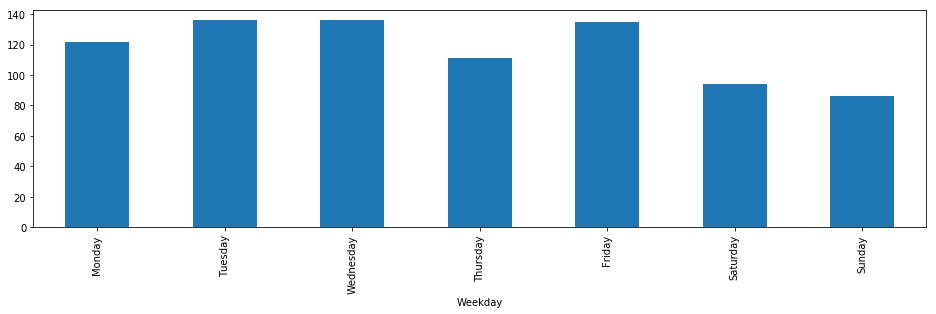

Rape


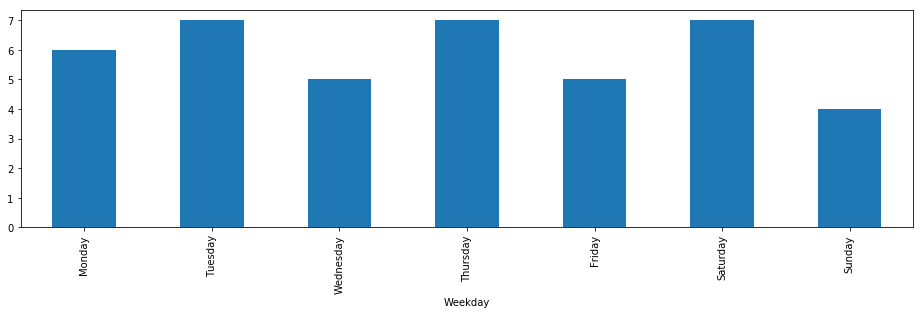

Robbery


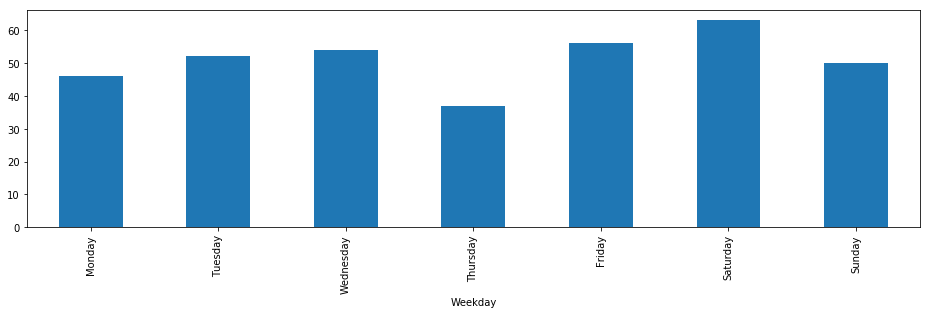

Sex offenses


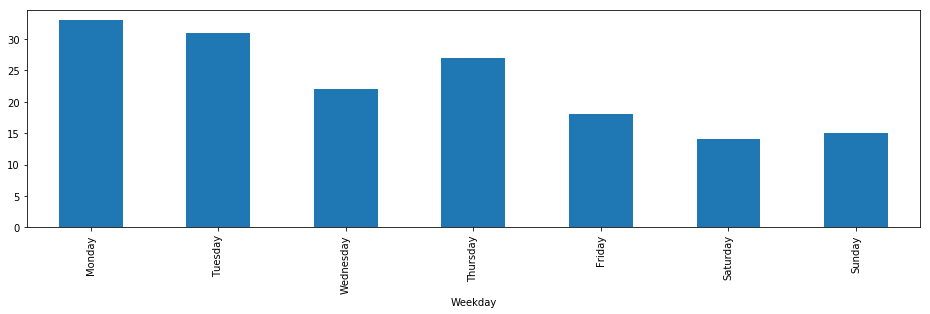

Stolen property


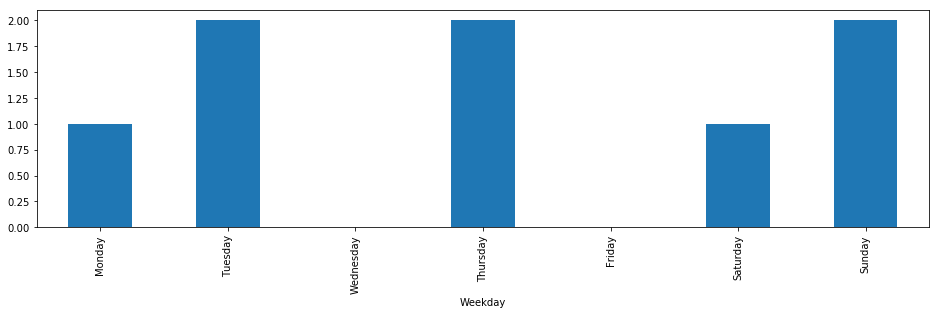

Suicide


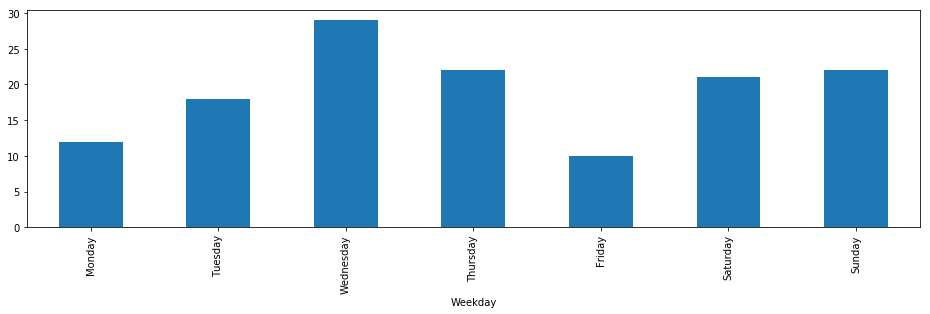

Vandalism


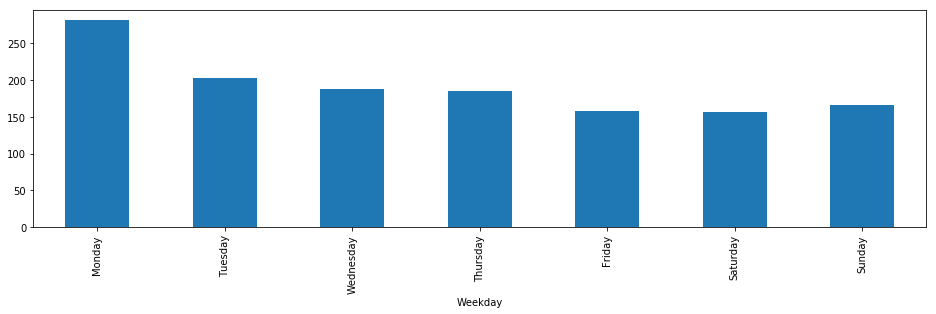

Vice


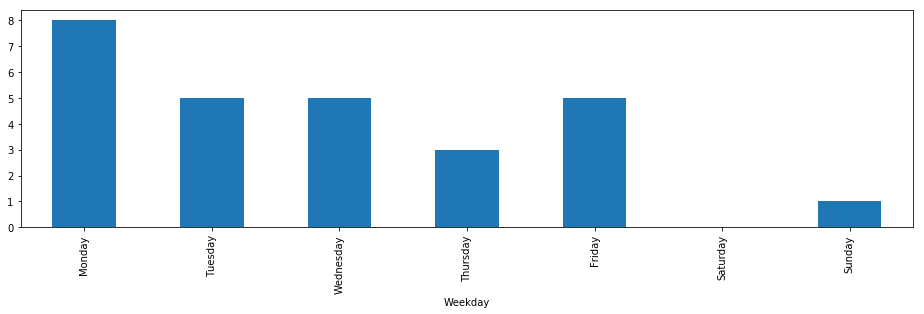

Weapon_offenses


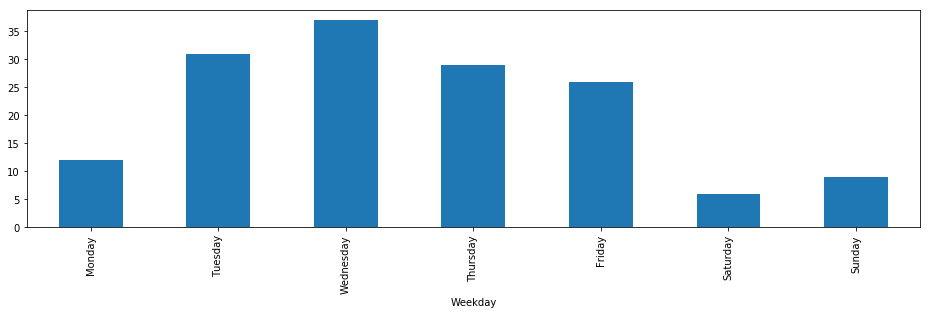

In [14]:
for cat in cat_weekday_pt.index:
    print(cat)
    cat_weekday_pt.loc[cat][['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar(figsize=(16, 4))
    plt.show()  

In [15]:
# Mean between time of occurrences in the same catgory
interval_time_df = crimes_df[['Category', 'Dispatch Date / Time']].copy()
interval_time_df.sort_values(['Category', 'Dispatch Date / Time'], inplace=True)
interval_time_df['Interval Time'] = interval_time_df['Dispatch Date / Time'].diff()
interval_time_df['Interval Time'][interval_time_df['Category'] != interval_time_df['Category'].shift()] = pd.NaT
interval_time_df.dropna(inplace=True)
interval_time_df.groupby('Category').describe().sort_values(('Interval Time', 'count'), ascending=False)

/home/ryuga/anaconda3/envs/Topicos_F/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Interval Time                           \
                             count                     mean   
Category                                                      
Larceny                       6276   0 days 00:42:11.967654   
Miscelaneous                  3780   0 days 01:09:58.218253   
Drugs                         2230   0 days 01:58:43.822869   
Miscelaneous traffic          1731   0 days 02:33:02.288272   
Assault                       1379   0 days 03:11:55.451776   
Vandalism                     1337   0 days 03:17:43.124906   
Burglary                      1299   0 days 03:23:33.076982   
Forgery                       1280   0 days 03:26:42.166406   
Other offenses                 819   0 days 05:22:55.964590   
Liquor laws                    640   0 days 06:50:16.095312   
Disordely conduct              467   0 days 09:20:46.824411   
Auto theft                     405   0 days 10:50:30.866666   
Robbery                        357   0 days 12:19:01.350140   
Juvenile                       273   0 days 16:05:31.333333   
Embezzle                       174   1 days 01:13:14.097701   
Aggravated assault             167   1 days 01:34:31.604790   
Sex offenses                   159   1 days 03:36:12.528301   
Weapon_offenses                149   1 days 05:03:36.906040   
Family offenses                145   1 days 05:59:11.420689   
Suicide                        133   1 days 09:09:22.819548   
Rape                            40   4 days 05:17:33.275000   
Bad checks                      39   4 days 10:21:24.333333   
Arson                           28   6 days 03:36:01.250000   
Vice                            26   5 days 16:26:01.115384   
Stolen property                  7  12 days 17:37:45.142857   
Homicide                         3  13 days 10:13:50.666666   

                                                                \
                                          std              min   
Category                                                         
Larceny                0 days 01:21:34.320357  0 days 00:00:00   
Miscelaneous           0 days 01:29:38.004431  0 days 00:00:00   
Drugs                  0 days 03:06:28.173612  0 days 00:00:00   
Miscelaneous traffic   0 days 04:53:36.491527  0 days 00:00:00   
Assault                0 days 03:49:52.979589  0 days 00:00:00   
Vandalism              0 days 03:54:14.821860  0 days 00:00:00   
Burglary               0 days 04:02:03.494336  0 days 00:00:00   
Forgery                0 days 05:53:24.545809  0 days 00:00:00   
Other offenses         0 days 05:49:36.056457  0 days 00:00:00   
Liquor laws            0 days 09:55:47.879855  0 days 00:00:00   
Disordely conduct      0 days 11:59:41.871914  0 days 00:00:00   
Auto theft             0 days 12:29:46.926863  0 days 00:00:00   
Robbery                0 days 13:05:09.713536  0 days 00:00:01   
Juvenile               0 days 17:40:14.679139  0 days 00:00:45   
Embezzle               1 days 07:34:59.792209  0 days 00:01:21   
Aggravated assault     1 days 03:26:53.829812  0 days 00:02:55   
Sex offenses           1 days 06:45:01.370944  0 days 00:00:48   
Weapon_offenses        1 days 08:44:29.930459  0 days 00:13:24   
Family offenses        1 days 08:13:19.711287  0 days 00:00:28   
Suicide                1 days 11:59:19.871769  0 days 00:02:08   
Rape                   4 days 04:36:40.037677  0 days 00:22:27   
Bad checks             3 days 22:34:45.507525  0 days 01:44:34   
Arson                  5 days 01:57:17.640670  0 days 00:00:00   
Vice                   5 days 20:53:05.222136  0 days 00:01:20   
Stolen property       13 days 03:54:28.077315  1 days 00:51:40   
Homicide              12 days 00:53:14.431489  0 days 19:45:34   

                                                                      \
                                         25%                     50%   
Category                                                               
Larceny                      0 days 00:07:07  0 days 00:17:57.

# Interval between occurrences

It's important to analysis the interval between crimes so it's possible to manage resource and adapt to respond quickly enough and be prepared to next occurrence. Considering that the crimes with less than 100 occurrences are not trustable to extract same info it's possible to say that all crimes will probaly repeat within 2 days, speaking in terms of mean.

Naturally the crimes with more incidence have the least minimum. The standard deviation to this data is not much greater than the mean. This shows same reliabilty on the information that can be extracted.